In [1]:
import cv2
import os
from random import randrange

In [2]:
media = '8R.mp4'

In [3]:
m = 8
n = 1

In [4]:
cap = cv2.VideoCapture ('Inputs/' + media)
tot = cap.get(cv2.CAP_PROP_FRAME_COUNT)
print(tot)
if not os.path.exists("Frames/"+media.split('.')[0]):
    os.mkdir("Frames/"+media.split('.')[0])

1080.0


In [5]:
frames = []
for i in range(m):
    print("Segment", i)
    if not os.path.exists("Frames/"+media.split('.')[0]+"/Segment"+str(i)):
        os.mkdir("Frames/"+media.split('.')[0]+"/Segment"+str(i))
    for j in range(n):
        x = randrange(round((tot/m)*i), round((tot/m)*(i+1)))
        frames.append(x)
        print(x)

Segment 0
62
Segment 1
202
Segment 2
304
Segment 3
510
Segment 4
541
Segment 5
783
Segment 6
921
Segment 7
989


In [6]:
cnt1 = 0
cnt2 = 0
while cap.isOpened():
    frameId = cap.get(1)
    ret, frame = cap.read()
    if ret != True:
        break
    if frameId in frames:
        cv2.imwrite("Frames/"+media.split('.')[0]+"/Segment"+str(cnt1)+'/'+media.split('.')[0]+'_'+
                    str(cnt1)+str(cnt2)+'.png', frame)
        if not os.path.exists("Temp/"+media.split('.')[0]):
            os.mkdir("Temp/"+media.split('.')[0])
        cv2.imwrite("Temp/"+media.split('.')[0]+'/'+media.split('.')[0]+'_'+str(cnt1)+str(cnt2)+'.png', frame)
        cnt2 += 1
        if cnt2 == n:
            cnt2 = 0
            cnt1 += 1
        

In [7]:
import dlib
import argparse
import cv2
import time
import process_dlib_boxes
import face_recognition

from os import listdir
from os.path import isfile, join
from deepface import DeepFace
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [8]:
path = "Frames/"+media.split('.')[0]+"/Segment"    

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


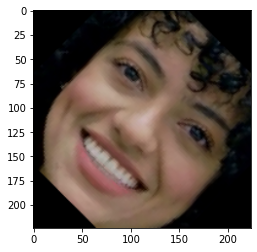

In [9]:
if not os.path.exists("Outputs/"):
    os.mkdir("Outputs/")

if not os.path.exists("Outputs/"+media.split('.')[0]):
    os.mkdir("Outputs/"+media.split('.')[0])

for i in range(m):
    mypath = path + str(i)
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    if (len(onlyfiles)>0):
        inp = onlyfiles[0]
        
        try: 
            os.mkdir("Outputs/"+media.split('.')[0]+"/Segment"+str(i)) 
        except OSError as error: 
            print(error)  
            
        # read the image and convert to RGB color format
        image = cv2.imread(path+str(i)+"/"+inp)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # path for saving the result image
        save_name = "Outputs/"+media.split('.')[0]+"/Segment"+str(i)+"/"+inp.split('/')[-1].split('.')[0]+".png"
        # face location extraction
        face_locations = face_recognition.face_locations(image_rgb)

#         for top, right, bottom, left in face_locations:
#             cv2.rectangle(image, (left, top), (right, bottom), (0, 0, 255), 2)
        
        if not os.path.exists("Outputs/"+media.split('.')[0]+"/Faces"):
            os.mkdir("Outputs/"+media.split('.')[0]+"/Faces")
        
        # path for saving the result image
        save_name_1 = "Outputs/"+media.split('.')[0]+"/Faces/"+inp.split('/')[-1].split('.')[0]+".png"
        
        aligned_face = DeepFace.detectFace(image)
        print(type(aligned_face))
        plt.imshow(aligned_face)
        plt.imsave(save_name_1, aligned_face)
        cv2.imwrite(save_name, image)
        
    else:
        break